# House Prices - Advanced Regression Techniques

# Dataset Description

## File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
## Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 1. Coleta dos dados

## 1.1. Importando as bibliotecas

In [163]:
import pandas as pd
import numpy as np

## 1.2. Utilizando o Pandas para pegar o treino e teste

In [164]:
df_train = pd.read_csv("data/train.csv", index_col=0)
df_test = pd.read_csv("data/test.csv", index_col=0)

In [165]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [166]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 2. Tratamento dos dados

### 2.1. MSSubClass

Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [167]:
# Qual é o tipo de dado da coluna?
print(df_train["MSSubClass"].dtypes)
print(df_test["MSSubClass"].dtypes)

int64
int64


In [168]:
# Existem valores nulos na coluna?
print(df_train["MSSubClass"].isnull().sum())
print(df_test["MSSubClass"].isnull().sum())

0
0


In [169]:
# Quais são os valores distintos existentes na coluna?
print(df_train["MSSubClass"].unique())
print("\n")
print(df_train["MSSubClass"].unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


### 2.2. MSZoning

Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [170]:
# Qual é o tipo de dado da coluna?
print(df_train["MSZoning"].dtypes)
print(df_test["MSZoning"].dtypes)

object
object


In [171]:
# Existem valores nulos na coluna?
print(df_train["MSZoning"].isnull().sum())
print(df_test["MSZoning"].isnull().sum()) # Problemático, porque vou ter que pegar outras informações para preencher isso.

0
4


In [172]:
# Mostrandos as linhas que tem o MSZoning nulo
print(df_test[df_test["MSZoning"].isnull()])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
2217          20      NaN         80.0    14584   Pave   NaN      Reg   
2251          70      NaN          NaN    56600   Pave   NaN      IR1   
2905          20      NaN        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                    ...                                     
1916         Lvl       NaN    Inside  ...           0        0    NaN   NaN   
2217         Low    AllPub    Inside  ...           0        0    NaN   NaN   
2251         Low    AllPub    Inside  ...           0        0    NaN   NaN   
2905         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                

In [173]:
# Preenchendo as linhas da coluna MSZoning de NaN para o valor que mais se repete no DataFrame de treino
df_test["MSZoning"] = df_test["MSZoning"].fillna(df_train["MSZoning"].mode().iloc[0])
print(df_test["MSZoning"].isnull().sum())

0


In [174]:
# Quais são os valores distintos existentes na coluna?
print(df_train["MSZoning"].unique())
print("\n")
print(df_test["MSZoning"].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']


['RH' 'RL' 'RM' 'FV' 'C (all)']


In [175]:
df_train["MSZoning"] = df_train["MSZoning"].replace({"FV": 0, "RL": 1, "RM": 2, "RH": 3, "C (all)": 4})
df_test["MSZoning"] = df_test["MSZoning"].replace({"FV": 0, "RL": 1, "RM": 2, "RH": 3, "C (all)": 4})

### 2.3. LotFrontage

Linear feet of street connected to property

In [176]:
# Qual é o tipo de dado da coluna?
print(df_train["LotFrontage"].dtypes)
print(df_test["LotFrontage"].dtypes)

float64
float64


In [177]:
# Existem valores nulos na coluna?
print(df_train["LotFrontage"].isnull().sum())
print(df_test["LotFrontage"].isnull().sum())

259
227


In [178]:
# Preencher os valores nulos

### 2.4. LotArea

Lot size in square feet

In [179]:
# Qual é o tipo de dado da coluna?
print(df_train["LotArea"].dtypes)
print(df_test["LotArea"].dtypes)

int64
int64


In [180]:
# Existem valores nulos na coluna?
print(df_train["LotArea"].isnull().sum())
print(df_test["LotArea"].isnull().sum())

0
0


### 2.5. Street

Type of road access to property

       Grvl	Gravel 
       Pave	Paved

In [181]:
# Qual é o tipo de dado da coluna?
print(df_train["Street"].dtypes)
print(df_test["Street"].dtypes)

object
object


In [182]:
# Existem valores nulos na coluna?
print(df_train["Street"].isnull().sum())
print(df_test["Street"].isnull().sum())

0
0


In [183]:
# Mudando Grvl para 0 e Pave para 1
df_train["Street"] = df_train["Street"].replace({"Grvl": 0, "Pave": 1})
df_test["Street"] = df_test["Street"].replace({"Grvl": 0, "Pave": 1})

# 3. Análise dos dados

### 3.1. Importando as bibliotecas

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2. MSSubClass

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

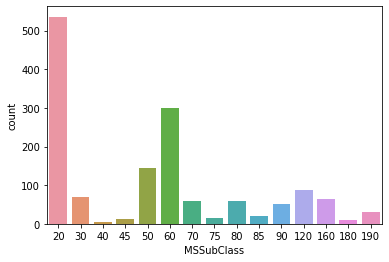

In [185]:
sns.countplot(data=df_train, x="MSSubClass")

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

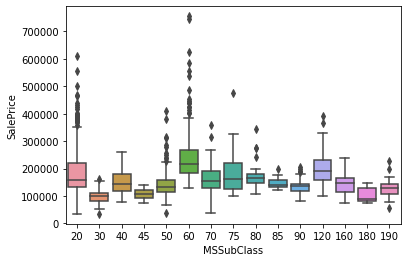

In [186]:
sns.boxplot(data=df_train, x="MSSubClass", y="SalePrice")

In [187]:
print(df_train["MSSubClass"].corr(df_train["SalePrice"]))

-0.08428413512659517


### 3.3. MSZoning

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

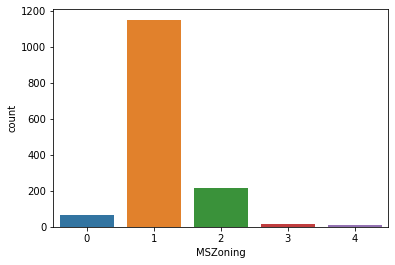

In [188]:
sns.countplot(data=df_train, x="MSZoning")

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

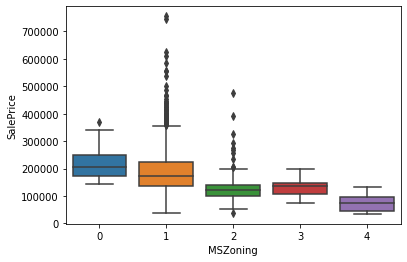

In [189]:
sns.boxplot(data=df_train, x="MSZoning", y="SalePrice")

In [190]:
print(df_train["MSZoning"].corr(df_train["SalePrice"]))

-0.3081575056766912
